In [2]:
pip install surprise

     |████████████████████████████████| 11.8MB 341kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617625 sha256=fb5d14e3518bb81dbb2963482fd234b045138d38eba67016e01177843ed8ed3d
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [47]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Load the builtin Movielens-100k data 
Data = Dataset.load_builtin("ml-100k")

In [17]:
#fcp-fraction of concordant pairs
def fcp_vs_factors(algorithm, data):
   
  fcp_algorithm = []
  
  for k in range(1, 101, 1):
    algo = algorithm(n_factors = k)
    
    loss_fce = cross_validate(algo, data, measures=['fcp'], cv=3, verbose=False)["test_fcp"].mean() 
    fcp_algorithm.append(loss_fce)
  
  return fcp_algorithm

In [18]:
fcp_svd = fcp_vs_factors(SVD,Data)
fcp_svd

[0.7004952032210116,
 0.7030928651134132,
 0.7028737267468738,
 0.7031221262073251,
 0.7023158469385237,
 0.7024630239011452,
 0.7014417433854909,
 0.7045035195525093,
 0.7013965724048855,
 0.7011253475786003,
 0.7020222554083594,
 0.7049013836454471,
 0.702206965680135,
 0.7003803457812573,
 0.7011716883305419,
 0.7015459975277084,
 0.7019126512801804,
 0.7023824719417265,
 0.7018929550651567,
 0.7004739915224598,
 0.7001050195949606,
 0.7040787437680925,
 0.7020357923117689,
 0.70303556740028,
 0.7033860560253423,
 0.7027157501663992,
 0.7015754413825824,
 0.703843667274651,
 0.7024566842407727,
 0.701481043113679,
 0.7012687640838386,
 0.7026403435650299,
 0.7046406117396775,
 0.7026313633717916,
 0.7025703376788931,
 0.7007491652269978,
 0.7017066668615524,
 0.7014897024425704,
 0.6995896650418648,
 0.7020536289073771,
 0.7029752069830245,
 0.7006862699494274,
 0.7017580884368507,
 0.7012060637185051,
 0.7019288465057806,
 0.7033759455795224,
 0.7048080735310944,
 0.700865541336633

In [44]:
def plot_fcp(fcp, algorithm):
  
  plt.figure(num=None, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')

  plt.plot(fcp)
  plt.xlim(0,100)
  plt.title("{0} Performance: fcp Against Number of Factors".format(algorithm), size = 20 )
  plt.ylabel("Mean fcp (cv=3)")
  plt.xlabel("{0}(n_factor = k)".format(algorithm))
  plt.axvline(np.argmin(fcp), color = "r")
  return np.argmin(fcp)


87

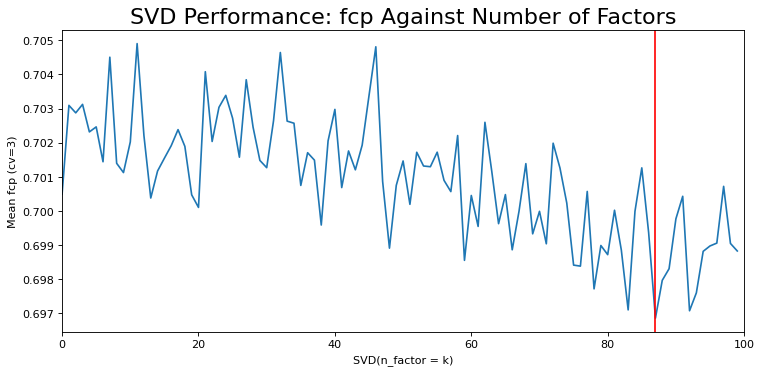

In [45]:
plot_fcp(fcp_svd,"SVD")

In [48]:
#split into train and test 
train_ratings, test_ratings = train_test_split(Data, test_size=.20, random_state = 42)

algo_SVD = SVD(n_factors = 87)
algo_SVD.fit(train_ratings)

# Predict ratings for all pairs (i,j) that are NOT in the training set.
predictions = algo_SVD.test(test_ratings)

# subset of the list  predictions
predictions[0:2]

[Prediction(uid='907', iid='143', r_ui=5.0, est=5, details={'was_impossible': False}),
 Prediction(uid='371', iid='210', r_ui=4.0, est=4.246676284566966, details={'was_impossible': False})]